In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
print(os.getcwd())

F:\Python Learning\Imarticus\Projects\Time Series


In [3]:
df = pd.read_csv("super_store.csv", parse_dates=['Order Date', 'Ship Date'], encoding = 'cp1252')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [6]:
df.Category.unique()

array(['Furniture'], dtype=object)

In [7]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [16]:
## Selecting only Order Date and Sales columns since we are doing only Sales Prediciton
df_sales = df.loc[:, ['Order Date', 'Sales']]

In [17]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.3 KB


In [18]:
## Renaming the Order Date column.
df_sales.columns = ['Order_Date', 'Sales']

In [19]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.3 KB


In [20]:
## Let us make it as Time Series by setting the index as Order Date
df_sales.set_index('Order_Date', inplace=True)

In [55]:
df_sales.reset_index(inplace=True)

In [58]:
df_sales.head(), df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.3 KB


(  Order_Date      Sales
 0 2016-11-08   261.9600
 1 2016-11-08   731.9400
 2 2015-10-11   957.5775
 3 2014-06-09    48.8600
 4 2014-06-09  1706.1840,
 None)

In [59]:
df_sales['Year'] = df_sales.Order_Date.dt.year
df_sales['Month'] = df_sales.Order_Date.dt.month

In [60]:
df_sales.head()

,Order_Date,Sales,Year,Month
0,2016-11-08,261.9600,2016,11
1,2016-11-08,731.9400,2016,11
2,2015-10-11,957.5775,2015,10
3,2014-06-09,48.8600,2014,6
4,2014-06-09,1706.1840,2014,6


In [61]:
df_sales.groupby(['Year','Month'])['Sales'].sum()

Year  Month
2014  1         6242.5250
      2         1839.6580
      3        14573.9560
      4         7944.8370
      5         6912.7870
      6        13206.1256
      7        10821.0510
      8         7320.3465
      9        23816.4808
      10       12304.2470
      11       21564.8727
      12       30645.9665
2015  1        11739.9416
      2         3134.3740
      3        12499.7830
      4        10475.6985
      5         9374.9505
      6         7714.1790
      7        13674.4200
      8         9638.5922
      9        26273.0230
      10       12026.6235
      11       30880.8325
      12       23085.8192
2016  1         7622.7430
      2         3925.5510
      3        12801.0920
      4        13212.0900
      5        15119.8350
      6        13070.5720
      7        13068.5190
      8        12483.2323
      9        27262.8809
      10       11872.5770
      11       31783.6288
      12       36678.7150
2017  1         5964.0320
      2         6866.3374


In [65]:
df_sales = df_sales[['Order_Date', 'Sales']].set_index('Order_Date')

In [66]:
df_sales.head()

,Sales
Order_Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


### Creating daily sales into Monthly Sales  using resample()

In [101]:
df_monthly_sales = df_sales.resample(rule='MS').sum().round(2)

In [102]:
print(type(df_monthly_sales))

<class 'pandas.core.frame.DataFrame'>


In [103]:
df_monthly_sales.head()

,Sales
Order_Date,
2014-01-01,6242.52
2014-02-01,1839.66
2014-03-01,14573.96
2014-04-01,7944.84
2014-05-01,6912.79


In [104]:
df_monthly_sales['2014-01':'2014-06']

,Sales
Order_Date,
2014-01-01,6242.52
2014-02-01,1839.66
2014-03-01,14573.96
2014-04-01,7944.84
2014-05-01,6912.79
2014-06-01,13206.13


### Visualizing the Time Series Dat

In [105]:
import matplotlib.pyplot as plt

<Figure size 1080x864 with 0 Axes>

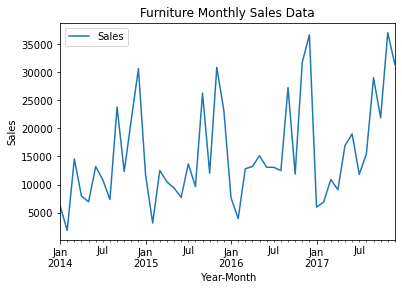

In [106]:
plt.figure(figsize=(15,12))
df_monthly_sales.plot()
plt.title("Furniture Monthly Sales Data")
plt.xlabel(" Year-Month")
plt.ylabel('Sales')
plt.show()

### Test for Stationarity


In [107]:
from statsmodels.tsa.stattools import adfuller, kpss

In [108]:
## ADF Test
## Null Hypothesis = Non-Stationary
## ALternate Hypothesis = Stationary

res = adfuller(df_monthly_sales )
print("P-Value : ", res[1])

P-Value :  8.450799287108568e-05


In [109]:
print('ADF Statistic: %f' % res[0])

print('p-value: %f' % res[1])

print('Critical Values:')

for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))
if res[0] < res[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.699026
p-value: 0.000085
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Reject Ho - Time Series is Stationary


In [110]:
kpss_res = kpss(df_monthly_sales, nlags='auto')

In [111]:
kpss_res[1]

0.0453687119513312

In [112]:
kpss_res[0]

0.4835629189360895

In [113]:
kpss_res[3]['5%']

0.463

In [114]:
kpss_res[0] < kpss_res[3]['5%']

False

### Decomposing the time series

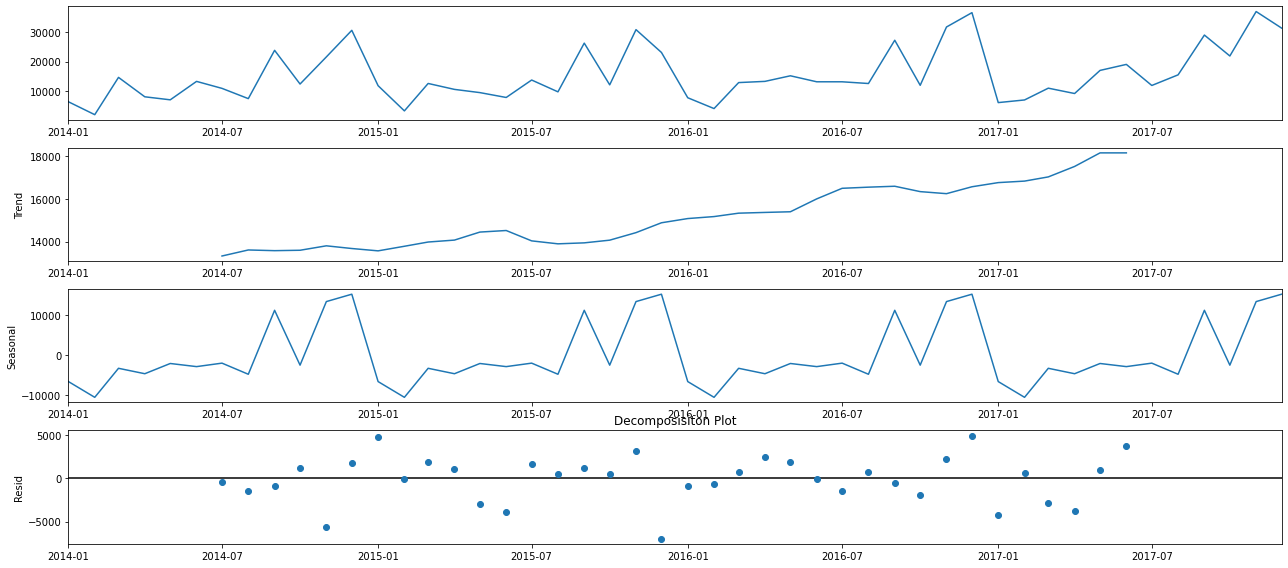

In [117]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_monthly_sales, model='additive')
fig = decomposition.plot()
plt.show()

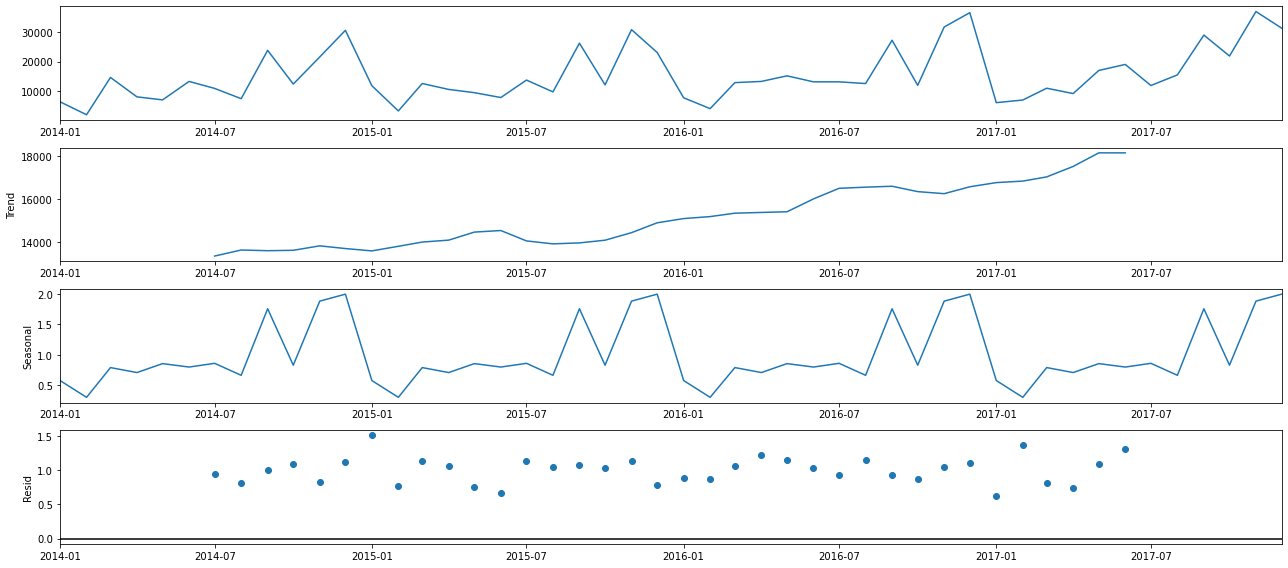

In [118]:
decomposition = sm.tsa.seasonal_decompose(df_monthly_sales, model='multiplicative')
fig = decomposition.plot()
plt.show()

### Forecasting the model

In [238]:
import itertools
p = d = q = range(0, 3)

print("p: {}, d: {}, q: {}".format(list(p), list(d), list(q)))
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

p: [0, 1, 2], d: [0, 1, 2], q: [0, 1, 2]
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [239]:
## We will be building all these models.
for i in range(len(pdq)):
    print('SARIMAX: {} x {}'.format(pdq[i], seasonal_pdq[i]))


SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 2) x (0, 0, 2, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 2) x (0, 1, 2, 12)
SARIMAX: (0, 2, 0) x (0, 2, 0, 12)
SARIMAX: (0, 2, 1) x (0, 2, 1, 12)
SARIMAX: (0, 2, 2) x (0, 2, 2, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)
SARIMAX: (1, 0, 2) x (1, 0, 2, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 2, 0) x (1, 2, 0, 12)
SARIMAX: (1, 2, 1) x (1, 2, 1, 12)
SARIMAX: (1, 2, 2) x (1, 2, 2, 12)
SARIMAX: (2, 0, 0) x (2, 0, 0, 12)
SARIMAX: (2, 0, 1) x (2, 0, 1, 12)
SARIMAX: (2, 0, 2) x (2, 0, 2, 12)
SARIMAX: (2, 1, 0) x (2, 1, 0, 12)
SARIMAX: (2, 1, 1) x (2, 1, 1, 12)
SARIMAX: (2, 1, 2) x (2, 1, 2, 12)
SARIMAX: (2, 2, 0) x (2, 2, 0, 12)
SARIMAX: (2, 2, 1) x (2, 2, 1, 12)
SARIMAX: (2, 2, 2) x (2, 2, 2, 12)


### Builing the time series models 

In [240]:
import warnings
warnings.filterwarnings('ignore')
aic_scores = {}
i = 1
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_monthly_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('{}: ARIMA{}x{} - AIC:{}'.format(i,param, param_seasonal, results.aic))
            aic_scores[i] = results.aic
            i += 1
        except:
            continue

1: ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1056.7150878428556
2: ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1546.6020590967082
3: ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:472.83739420227664
4: ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:691.3931452113369
5: ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:458.1256323313009
6: ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:221.00687626857578
7: ARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:476.61880448057235
8: ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:224.32590361586165
9: ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:6.0
10: ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:711.249281531994
11: ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1377.5975134215134
12: ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:472.1513769133529
13: ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:475.9267359023421
14: ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:455.2614602393312
15: ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:223.00614064277278
16: ARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:240.99723389298515
17: ARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:225.80394341474798
18: ARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:8.0
19

150: ARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:167.87171369718973
151: ARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:233.65178576519102
152: ARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:174.29769489309095
153: ARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:12.0
154: ARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:478.0636205996653
155: ARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:965.1159325422702
156: ARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:420.1601983140963
157: ARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:225.50628222035118
158: ARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:227.49823382268664
159: ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:168.89429177503422
160: ARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:10.0
161: ARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:12.0
162: ARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:14.0
163: ARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:1009.7887776978564
164: ARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:1263.8979709384373
165: ARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:459.9883787880987
166: ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:710.2740932624124
167: ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:449.9877844975888


299: ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:3271.320492062226
300: ARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:441.0381692758089
301: ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:659.7500024635001
302: ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:420.3053872137087
303: ARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:187.549541769685
304: ARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:439.7987586329191
305: ARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:189.6047879637313
306: ARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:12.0
307: ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:725.0000073647674
308: ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:2763.3083434605046
309: ARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:441.947938716429
310: ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:457.8251845505159
311: ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:422.41275734215117
312: ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:188.09561672295038
313: ARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:224.9943409205087
314: ARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:189.61070107575142
315: ARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:14.0
316: ARIMA(1, 0, 2)x(2, 0, 0, 12) - AI

447: ARIMA(1, 2, 1)x(1, 1, 2, 12) - AIC:173.06559827076643
448: ARIMA(1, 2, 1)x(1, 2, 0, 12) - AIC:196.62412539769755
449: ARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:176.5572360992103
450: ARIMA(1, 2, 1)x(1, 2, 2, 12) - AIC:12.0
451: ARIMA(1, 2, 1)x(2, 0, 0, 12) - AIC:447.5748689553245
452: ARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC:971.6002147197956
453: ARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC:430.0155363947049
454: ARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:191.5690254784416
455: ARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:192.58250935911727
456: ARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:174.84645034040926
457: ARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:10.0
458: ARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:12.0
459: ARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:14.0
460: ARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:920.9035480682414
461: ARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:3335.512479076613
462: ARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:406.64962107979926
463: ARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:636.7749897822644
464: ARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:391.0548207933016
465

597: ARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:438.6995701753287
598: ARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:665.516609183459
599: ARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:421.3560470772467
600: ARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:186.38248283721782
601: ARIMA(2, 1, 1)x(0, 2, 0, 12) - AIC:446.1325901916353
602: ARIMA(2, 1, 1)x(0, 2, 1, 12) - AIC:181.56708559499617
603: ARIMA(2, 1, 1)x(0, 2, 2, 12) - AIC:12.0
604: ARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:683.2643437585692
605: ARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:3046.4002913518566
606: ARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:439.80851998127406
607: ARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:420.132580496145
608: ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:416.43683953595666
609: ARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:189.6489743398184
610: ARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:188.53804785080735
611: ARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:181.9289479703076
612: ARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:14.0
613: ARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:416.975628267518
614: ARIMA(2, 1, 1)x(2, 0, 1, 12) - A

In [241]:
min(aic_scores, key=aic_scores.get)

9

In [143]:
type(aic_scores.keys())

dict_keys

In [242]:
 final_model = sm.tsa.statespace.SARIMAX(df_monthly_sales,
                                            order=(0,0,0),
                                            seasonal_order=(2,2,0,12),
                                             enforce_stationarity=False,
                                            enforce_invertibility=False)

In [243]:
final_results = final_model.fit()

In [244]:
final_results.aic

6.0

In [245]:
final_results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

### Validating the forecast

In [246]:
df_monthly_sales["2017":]

,Sales
Order_Date,
2017-01-01,5964.03
2017-02-01,6866.34
2017-03-01,10893.44
2017-04-01,9065.96
2017-05-01,16957.56
2017-06-01,19008.59
2017-07-01,11813.02
2017-08-01,15441.87
2017-09-01,29028.21


### Predicting the values

In [247]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = final_results.get_prediction(start=pd.to_datetime('2017-01-01'))
print(type(pred))

<class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>


In [248]:
## Printing the predicted values
pred.predicted_mean

Order_Date
2017-01-01     3505.54
2017-02-01     4716.73
2017-03-01    13102.40
2017-04-01    15948.48
2017-05-01    20864.73
2017-06-01    18426.96
2017-07-01    12462.62
2017-08-01    15327.87
2017-09-01    28252.74
2017-10-01    11718.54
2017-11-01    32686.43
2017-12-01    50271.60
Freq: MS, Name: predicted_mean, dtype: float64

             lower Sales   upper Sales
Order_Date                            
2017-01-01 -11012.950299  18024.030299
2017-02-01  -9801.760299  19235.220299
2017-03-01  -1416.090299  27620.890299
2017-04-01   1429.989701  30466.970299
2017-05-01   6346.239701  35383.220299
2017-06-01   3908.469701  32945.450299
2017-07-01  -2055.870299  26981.110299
2017-08-01    809.379701  29846.360299
2017-09-01  13734.249701  42771.230299
2017-10-01  -2799.950299  26237.030299
2017-11-01  18167.939701  47204.920299
2017-12-01  35753.109701  64790.090299


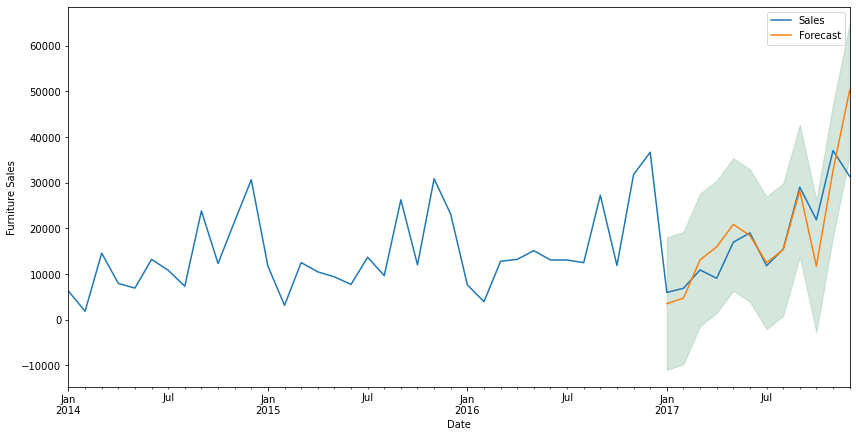

In [249]:

pred_ci = pred.conf_int(alpha=0.05)
print(pred_ci)
ax = df_monthly_sales['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci['lower Sales'],
                pred_ci['upper Sales'], color='seagreen', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Calculating MSE and RMSE

In [250]:
y_actual = df_monthly_sales["2017":].values.reshape(1, -1)
y_actual

array([[ 5964.03,  6866.34, 10893.44,  9065.96, 16957.56, 19008.59,
        11813.02, 15441.87, 29028.21, 21884.07, 37056.72, 31407.47]])

In [251]:
y_predicted = pred.predicted_mean.values
y_predicted

array([ 3505.54,  4716.73, 13102.4 , 15948.48, 20864.73, 18426.96,
       12462.62, 15327.87, 28252.74, 11718.54, 32686.43, 50271.6 ])

In [252]:
y_actual - y_predicted

array([[  2458.49,   2149.61,  -2208.96,  -6882.52,  -3907.17,    581.63,
          -649.6 ,    114.  ,    775.47,  10165.53,   4370.29, -18864.13]])

In [253]:
mse = ((y_actual - y_predicted) ** 2).mean()

In [254]:
rmse = np.sqrt(mse)

In [255]:
print("MSE : {}, RMSE: {}".format(mse, rmse))

MSE : 46487251.5277333, RMSE: 6818.156021075882


In [258]:
from sklearn.metrics import mean_squared_error

In [259]:
mean_squared_error(y_actual, y_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [1, 12]

In [260]:
np.sqrt(mean_squared_error(y_actual, y_predicted))

ValueError: Found input variables with inconsistent numbers of samples: [1, 12]

In [261]:
from statsmodels.tools.eval_measures import rmse
rmse(y_actual, y_predicted)

array([ 2458.49,  2149.61,  2208.96,  6882.52,  3907.17,   581.63,
         649.6 ,   114.  ,   775.47, 10165.53,  4370.29, 18864.13])

### Predicting for future time frame

In [262]:
future_pred = final_results.get_prediction(start = pd.to_datetime('2018-01-01'), end= pd.to_datetime('2018-12-01'))
future_pred.predicted_mean

2018-01-01     4305.32
2018-02-01     9807.13
2018-03-01     8985.79
2018-04-01     4919.83
2018-05-01    18795.28
2018-06-01    24946.61
2018-07-01    10557.52
2018-08-01    18400.51
2018-09-01    30793.54
2018-10-01    31895.56
2018-11-01    42329.81
2018-12-01    26136.23
Freq: MS, Name: predicted_mean, dtype: float64

In [263]:
future_pred.conf_int()  ## 95% confidence interval for future predictions

,lower Sales,upper Sales
2018-01-01,-10213.170299,18823.810299
2018-02-01,-4711.360299,24325.620299
2018-03-01,-5532.700299,23504.280299
2018-04-01,-9598.660299,19438.320299
2018-05-01,4276.789701,33313.770299
2018-06-01,10428.119701,39465.100299
2018-07-01,-3960.970299,25076.010299
2018-08-01,3882.019701,32919.000299
2018-09-01,16275.049701,45312.030299
2018-10-01,17377.069701,46414.050299
